In [6]:
import torch
from dataset import get_dataloaders
from train import train_model
from models.resnet import build_resnet18
from models.efficientnet import build_efficientnet_b0
from models.senet import build_senet_resnet18
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from PIL import Image
from torchvision import transforms
from torchvision.utils import make_grid

# 设置设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [7]:
import importlib
import train
importlib.reload(train)
from train import train_model


In [8]:
import importlib
import dataset
importlib.reload(dataset)
from dataset import get_dataloaders


In [9]:
data_dir = "./archive/Aerial_Landscapes"

train_loader, val_loader, class_names = get_dataloaders(data_dir, batch_size=32)
print("Classes:", class_names)





Classes: ['Agriculture', 'Airport', 'Beach', 'City', 'Desert', 'Forest', 'Grassland', 'Highway', 'Lake', 'Mountain', 'Parking', 'Port', 'Railway', 'Residential', 'River']


In [10]:
# Select the model architecture
model = build_resnet18(num_classes=len(class_names))  # 可替换为 build_efficientnet_b0 或 build_senet_resnet18


C:\Users\Lil Fake\.conda\envs\deepcv_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lil Fake\.conda\envs\deepcv_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
def plot_training(train_loss, val_acc, title=""):
    plt.figure(figsize=(12, 5))
    
   
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss" + title)
    plt.legend()

    
    plt.subplot(1, 2, 2)
    plt.plot(val_acc, label="Validation Accuracy", color="orange")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy" + title)
    plt.legend()

    
    plt.tight_layout()
    plt.show()


In [36]:
model = build_resnet18(num_classes=len(class_names))
model, train_loss_history, val_acc_history = train_model(
    model, train_loader, val_loader,
    num_epochs=10, lr=1e-4, device=device,
    save_path="resnet18.pth"
)


resnet_loss = train_loss_history.copy()
resnet_acc = val_acc_history.copy()


Epoch [1/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:31<00:00,  9.39it/s]


Epoch 1: Val Accuracy = 0.9587, Loss = 0.3993
✅ Best model updated and saved


Epoch [2/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:34<00:00,  8.77it/s]


Epoch 2: Val Accuracy = 0.9625, Loss = 0.0923
✅ Best model updated and saved


Epoch [3/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:31<00:00,  9.46it/s]


Epoch 3: Val Accuracy = 0.9683, Loss = 0.0501
✅ Best model updated and saved


Epoch [4/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:31<00:00,  9.38it/s]


Epoch 4: Val Accuracy = 0.9667, Loss = 0.0401


Epoch [5/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:32<00:00,  9.36it/s]


Epoch 5: Val Accuracy = 0.9688, Loss = 0.0291
✅ Best model updated and saved


Epoch [6/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:31<00:00,  9.44it/s]


Epoch 6: Val Accuracy = 0.9704, Loss = 0.0215
✅ Best model updated and saved


Epoch [7/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:31<00:00,  9.38it/s]


Epoch 7: Val Accuracy = 0.9613, Loss = 0.0176


Epoch [8/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:32<00:00,  9.32it/s]


Epoch 8: Val Accuracy = 0.9604, Loss = 0.0158


Epoch [9/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:32<00:00,  9.34it/s]


Epoch 9: Val Accuracy = 0.9492, Loss = 0.0435


Epoch [10/10]: 100%|█████████████████████████████████████████████████████████████████| 300/300 [00:31<00:00,  9.42it/s]


Epoch 10: Val Accuracy = 0.9637, Loss = 0.0295


C:\Users\Lil Fake\AppData\Local\Temp\ipykernel_42828\816726627.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


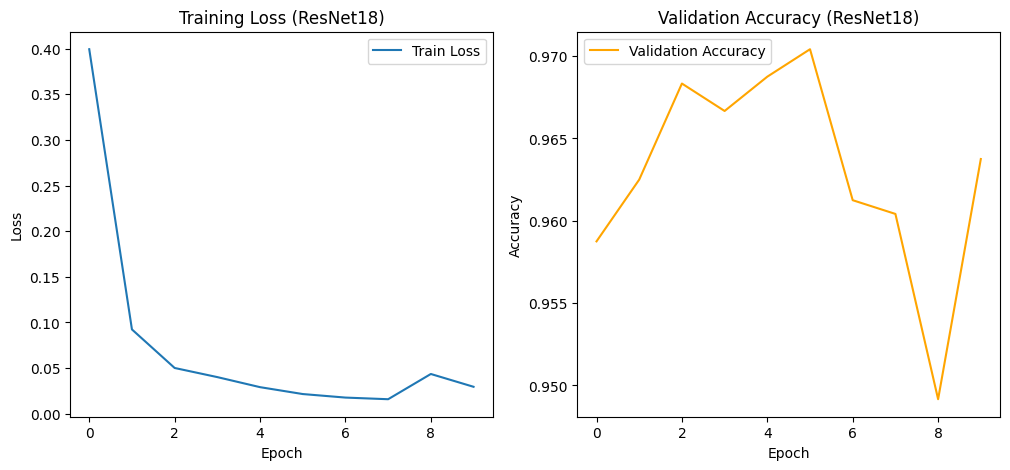

In [39]:
model = build_resnet18(num_classes=len(class_names))
model.load_state_dict(torch.load("best_model.pth"))
model.to(device)

plot_training(resnet_loss, resnet_acc, title=" (ResNet18)")


C:\Users\Lil Fake\.conda\envs\deepcv_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lil Fake\.conda\envs\deepcv_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Lil Fake\AppData\Local\Temp\ipykernel_55812\2193194562.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.c

Classification Report:
              precision    recall  f1-score   support

 Agriculture       1.00      1.00      1.00       152
     Airport       1.00      0.99      0.99       168
       Beach       1.00      0.99      1.00       158
        City       0.99      1.00      0.99       178
      Desert       0.99      1.00      1.00       157
      Forest       1.00      1.00      1.00       164
   Grassland       0.99      1.00      1.00       154
     Highway       0.99      0.99      0.99       176
        Lake       1.00      0.99      1.00       148
    Mountain       1.00      0.97      0.99       157
     Parking       1.00      1.00      1.00       138
        Port       1.00      1.00      1.00       165
     Railway       0.99      1.00      0.99       163
 Residential       0.99      0.99      0.99       168
       River       0.99      0.99      0.99       154

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
wei

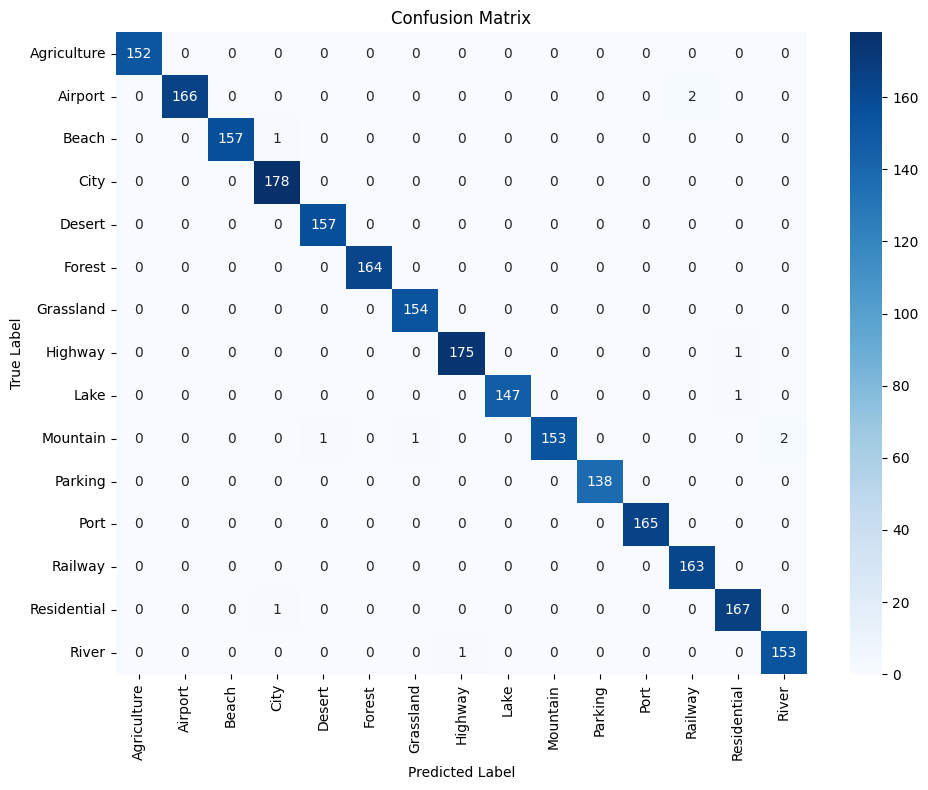

In [14]:
model = build_resnet18(num_classes=len(class_names))
model.load_state_dict(torch.load("resnet18.pth"))
model.to(device)

output_evaluation(model, val_loader, class_names)


In [40]:
# Train the EfficientNet-B0 model
model = build_efficientnet_b0(num_classes=len(class_names))
model, train_loss_history, val_acc_history = train_model(
    model, train_loader, val_loader,
    num_epochs=10, lr=1e-4, device=device,
    save_path="efficientnet_b0.pth"
)

# Save a copy of the training process
effnet_loss = train_loss_history.copy()
effnet_acc = val_acc_history.copy()


C:\Users\Lil Fake\.conda\envs\deepcv_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch [1/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:46<00:00,  6.52it/s]


Epoch 1: Val Accuracy = 0.9646, Loss = 0.8685
✅ Best model updated and saved


Epoch [2/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:46<00:00,  6.44it/s]


Epoch 2: Val Accuracy = 0.9708, Loss = 0.1599
✅ Best model updated and saved


Epoch [3/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:44<00:00,  6.71it/s]


Epoch 3: Val Accuracy = 0.9754, Loss = 0.0971
✅ Best model updated and saved


Epoch [4/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:43<00:00,  6.82it/s]


Epoch 4: Val Accuracy = 0.9779, Loss = 0.0587
✅ Best model updated and saved


Epoch [5/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:44<00:00,  6.79it/s]


Epoch 5: Val Accuracy = 0.9775, Loss = 0.0493


Epoch [6/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:45<00:00,  6.63it/s]


Epoch 6: Val Accuracy = 0.9812, Loss = 0.0315
✅ Best model updated and saved


Epoch [7/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:45<00:00,  6.55it/s]


Epoch 7: Val Accuracy = 0.9817, Loss = 0.0285
✅ Best model updated and saved


Epoch [8/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:44<00:00,  6.71it/s]


Epoch 8: Val Accuracy = 0.9808, Loss = 0.0276


Epoch [9/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.15it/s]


Epoch 9: Val Accuracy = 0.9742, Loss = 0.0245


Epoch [10/10]: 100%|█████████████████████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.23it/s]


Epoch 10: Val Accuracy = 0.9817, Loss = 0.0217


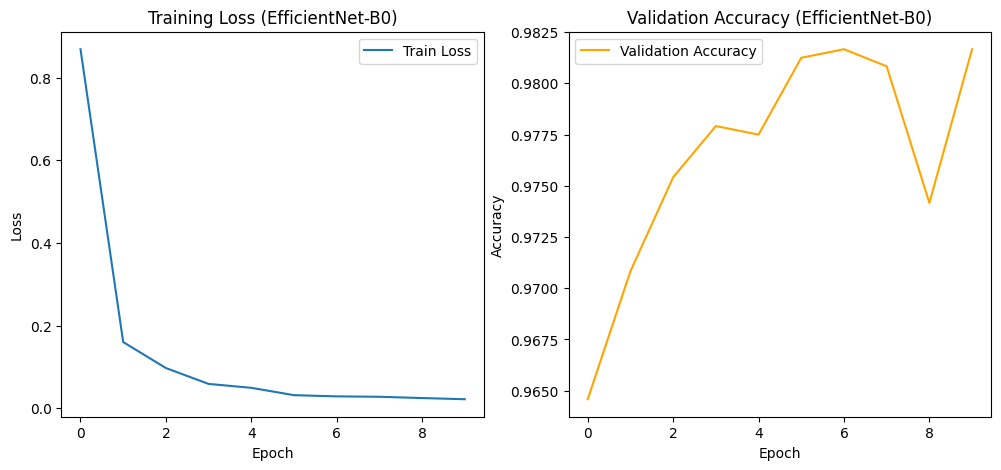

In [41]:
plot_training(effnet_loss, effnet_acc, title=" (EfficientNet-B0)")


In [ ]:
val_iter = iter(val_loader)
images, labels = next(val_iter)
idx = random.randint(0, images.size(0)-1)
image_tensor = images[idx]

# EfficientNet Utilize the final features layer
target_layer = model.features[-1]
apply_gradcam(model, image_tensor, target_layer, class_names)


 Classification Report:
              precision    recall  f1-score   support

 Agriculture       0.97      0.98      0.97       159
     Airport       0.98      0.96      0.97       165
       Beach       0.99      1.00      0.99       157
        City       0.99      0.99      0.99       161
      Desert       1.00      0.98      0.99       166
      Forest       0.99      0.97      0.98       147
   Grassland       0.98      0.97      0.97       177
     Highway       0.99      0.99      0.99       161
        Lake       0.99      0.97      0.98       153
    Mountain       0.96      0.99      0.97       164
     Parking       0.99      0.99      0.99       153
        Port       1.00      0.98      0.99       168
     Railway       0.97      0.99      0.98       157
 Residential       0.99      0.99      0.99       152
       River       0.95      0.98      0.96       160

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
we

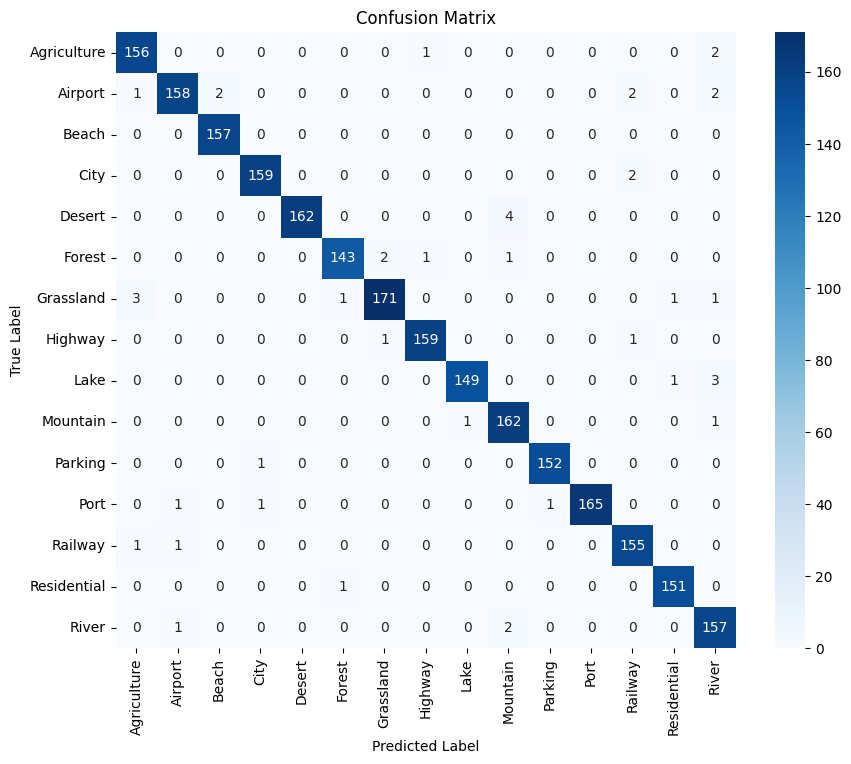

In [43]:
evaluate_model(model, val_loader, class_names)


In [17]:
model = build_senet_resnet18(num_classes=len(class_names))
model.load_state_dict(torch.load("senet_resnet18.pth"))
model.to(device)
# Build and train the SENet-ResNet18 model
model, train_loss_history, val_acc_history = train_model(
    model, train_loader, val_loader,
    num_epochs=10, lr=1e-4,
    device=device,
    save_path="senet_resnet18.pth"
)


C:\Users\Lil Fake\.conda\envs\deepcv_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lil Fake\.conda\envs\deepcv_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Lil Fake\AppData\Local\Temp\ipykernel_55812\4211539728.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.c

Epoch 1: Val Accuracy = 0.9900, Loss = 0.0593
✅ Best model updated and saved


Epoch [2/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:30<00:00,  9.93it/s]


Epoch 2: Val Accuracy = 0.9771, Loss = 0.0327


Epoch [3/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:31<00:00,  9.59it/s]


Epoch 3: Val Accuracy = 0.9862, Loss = 0.0396


Epoch [4/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:30<00:00,  9.91it/s]


Epoch 4: Val Accuracy = 0.9912, Loss = 0.0206
✅ Best model updated and saved


Epoch [5/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:32<00:00,  9.23it/s]


Epoch 5: Val Accuracy = 0.9912, Loss = 0.0109


Epoch [6/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:30<00:00,  9.91it/s]


Epoch 6: Val Accuracy = 0.9892, Loss = 0.0180


Epoch [7/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:31<00:00,  9.66it/s]


Epoch 7: Val Accuracy = 0.9888, Loss = 0.0146


Epoch [8/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:30<00:00,  9.84it/s]


Epoch 8: Val Accuracy = 0.9871, Loss = 0.0291


Epoch [9/10]: 100%|██████████████████████████████████████████████████████████████████| 300/300 [00:30<00:00,  9.94it/s]


Epoch 9: Val Accuracy = 0.9838, Loss = 0.0206


Epoch [10/10]: 100%|█████████████████████████████████████████████████████████████████| 300/300 [00:31<00:00,  9.62it/s]


Epoch 10: Val Accuracy = 0.9900, Loss = 0.0161


In [26]:
senet_loss = train_loss_history.copy()
senet_acc = val_acc_history.copy()



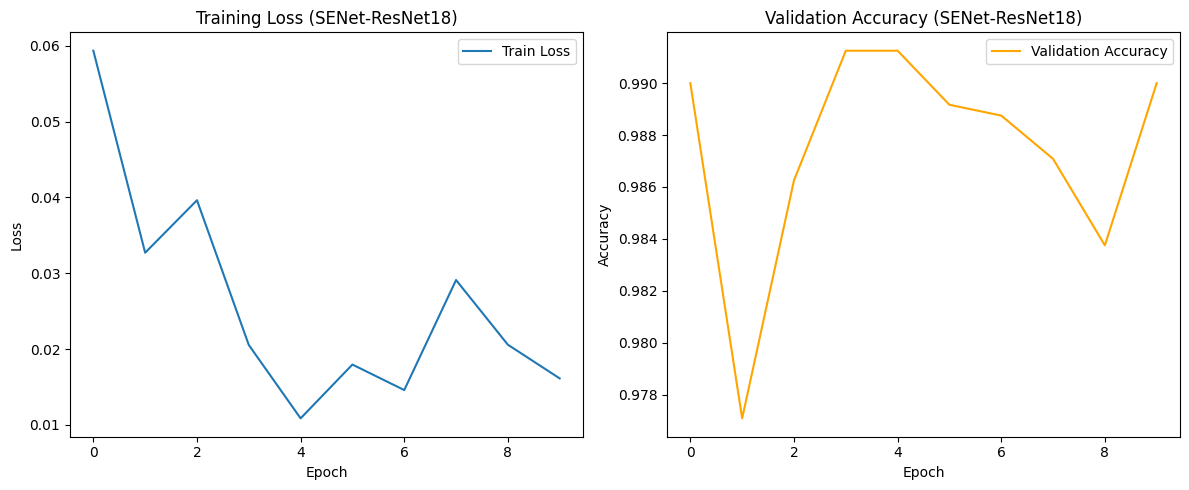

In [27]:
plot_training(senet_loss, senet_acc, title=" (SENet-ResNet18)")



C:\Users\Lil Fake\.conda\envs\deepcv_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Lil Fake\.conda\envs\deepcv_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Lil Fake\AppData\Local\Temp\ipykernel_55812\3916789578.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.c

Classification Report:
              precision    recall  f1-score   support

 Agriculture       1.00      1.00      1.00       152
     Airport       1.00      0.99      1.00       168
       Beach       1.00      1.00      1.00       158
        City       0.99      1.00      0.99       178
      Desert       0.99      1.00      1.00       157
      Forest       1.00      1.00      1.00       164
   Grassland       0.99      0.99      0.99       154
     Highway       1.00      0.99      1.00       176
        Lake       1.00      0.99      1.00       148
    Mountain       0.99      0.99      0.99       157
     Parking       1.00      1.00      1.00       138
        Port       1.00      1.00      1.00       165
     Railway       1.00      0.99      1.00       163
 Residential       0.99      1.00      1.00       168
       River       0.99      0.99      0.99       154

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
wei

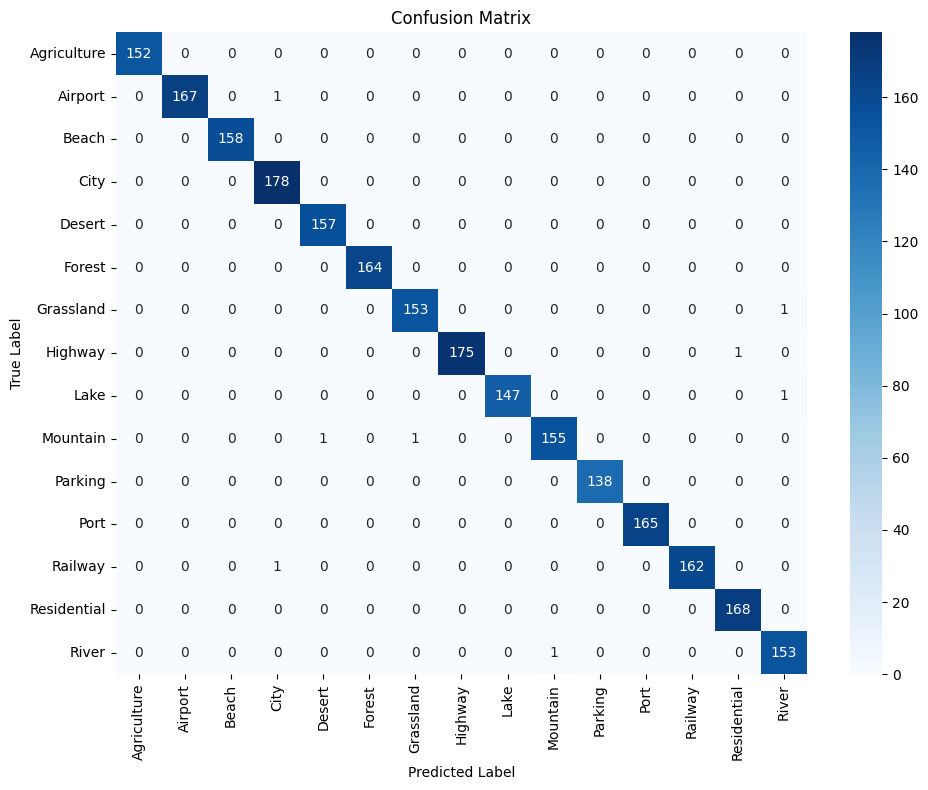

In [15]:
model = build_senet_resnet18(num_classes=len(class_names))
model.load_state_dict(torch.load("senet_resnet18.pth"))
model.to(device)

output_evaluation(model, val_loader, class_names)



In [3]:
import cv2
def apply_gradcam(model, image_tensor, target_layer, class_names):
    model.eval()
    gradients = []
    activations = []

    def backward_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0])
    def forward_hook(module, input, output):
        activations.append(output)

    handle_fw = target_layer.register_forward_hook(forward_hook)
    handle_bw = target_layer.register_backward_hook(backward_hook)

    image_tensor = image_tensor.to(device)
    output = model(image_tensor.unsqueeze(0))
    class_idx = torch.argmax(output)
    output[0, class_idx].backward()

    grads = gradients[0][0].cpu().detach().numpy()
    acts = activations[0][0].cpu().detach().numpy()
    weights = np.mean(grads, axis=(1, 2))
    cam = np.sum(acts * weights[:, np.newaxis, np.newaxis], axis=0)
    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (image_tensor.shape[2], image_tensor.shape[1]))
    cam -= cam.min()
    cam /= cam.max()

    # Visualization
    img_np = image_tensor.cpu().permute(1, 2, 0).numpy()
    plt.imshow(img_np)
    plt.imshow(cam, cmap='jet', alpha=0.5)
    plt.title(f"Predicted: {class_names[class_idx.item()]}")
    plt.axis('off')
    plt.show()

    handle_fw.remove()
    handle_bw.remove()


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def output_evaluation(model, val_loader, class_names):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Classification Indicator Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()
